##  Data Processing
This notebook focuses on loading, cleaning, and preparing the employee dataset for further analysis.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load Raw Data

In [4]:
data = pd.read_excel(r"C:\Users\RIJUL\Downloads\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xlsx")
print('Data Loaded Successfully')
print(data.shape)
print(data.head())

Data Loaded Successfully
(1200, 28)
  EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                           

### Step 2: Check Missing Values

In [18]:
missing = data.isnull().sum()
print('Missing values per column:\n', missing)

Missing values per column:
 EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64


* Visualize missing values

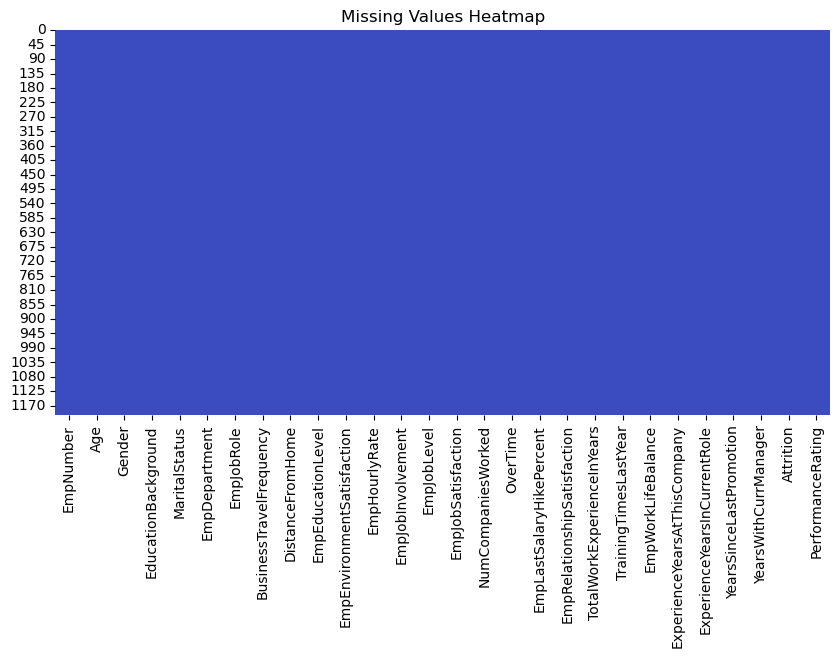

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), cbar=False, cmap='coolwarm')
plt.title('Missing Values Heatmap')
plt.show()

### Step 3: Handle Missing Values

In [20]:
data.fillna(data.mean(numeric_only=True), inplace=True)
print('Missing values handled.')

Missing values handled.


### Step 4: Encode Categorical Features

In [21]:
cat_cols = data.select_dtypes(include=['object']).columns
print('Categorical Columns:', cat_cols.tolist())

Categorical Columns: ['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']


In [23]:
data = pd.get_dummies(data, drop_first=True)
print('Categorical Encoding Completed')

Categorical Encoding Completed


### Step 5: Save Processed Data

In [25]:
import os

In [26]:
# Create folders if they don’t exist
os.makedirs('../data/processed', exist_ok=True)

In [27]:
data.to_csv('../data/processed/processed_data.csv', index=False)
print('Processed data saved at ../data/processed/processed_data.csv')

Processed data saved at ../data/processed/processed_data.csv
